In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [4]:
import warnings
warnings.filterwarnings('ignore')

**Gather and clean data**

In [6]:
data = pd.read_csv('superstore_dataset2011-2015.csv', encoding='ISO-8859-1')

**Explore the data**

1. Display top 5 rows

In [7]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,42433,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,...,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.30,2,0.00,106.14,35.46,Medium
1,22253,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.37,3,0.10,36.04,9.72,Medium
2,48883,HU-2011-1220,1/1/2011,5/1/2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,...,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.12,4,0.00,29.64,8.17,High
3,11731,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,...,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.87,3,0.50,-26.05,4.82,High
4,22255,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.67,5,0.10,37.77,4.70,Medium


2. Column names

In [9]:
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

3. Shape

In [10]:
data.shape

(51290, 24)

4. Info

In [14]:
data.info

<bound method DataFrame.info of        Row ID         Order ID  Order Date Ship Date       Ship Mode  \
0       42433     AG-2011-2040    1/1/2011  6/1/2011  Standard Class   
1       22253    IN-2011-47883    1/1/2011  8/1/2011  Standard Class   
2       48883     HU-2011-1220    1/1/2011  5/1/2011    Second Class   
3       11731  IT-2011-3647632    1/1/2011  5/1/2011    Second Class   
4       22255    IN-2011-47883    1/1/2011  8/1/2011  Standard Class   
...       ...              ...         ...       ...             ...   
51285   32593   CA-2014-115427  31-12-2014  4/1/2015  Standard Class   
51286   47594     MO-2014-2560  31-12-2014  5/1/2015  Standard Class   
51287    8857   MX-2014-110527  31-12-2014  2/1/2015    Second Class   
51288    6852   MX-2014-114783  31-12-2014  6/1/2015  Standard Class   
51289   36388   CA-2014-156720  31-12-2014  4/1/2015  Standard Class   

      Customer ID     Customer Name      Segment         City  \
0        TB-11280   Toby Braunhardt   

5. Null values

In [17]:
data.isna().sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

6. Check duplicates and drop them

In [19]:
data.duplicated().any()

False

7. Overall statistics

In [20]:
data.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
count,51290.00,9994.00,51290.00,51290.00,51290.00,51290.00,51290.00
mean,25645.50,55190.38,246.49,3.48,0.14,28.61,26.38
std,14806.29,32063.69,487.57,2.28,0.21,174.34,57.30
min,1.00,1040.00,0.44,1.00,0.00,-6599.98,0.00
25%,12823.25,23223.00,30.76,2.00,0.00,0.00,2.61
50%,25645.50,56430.50,85.05,3.00,0.00,9.24,7.79
75%,38467.75,90008.00,251.05,5.00,0.20,36.81,24.45
max,51290.00,99301.00,22638.48,14.00,0.85,8399.98,933.57


8. Drop unnecessary columns

In [21]:
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

In [22]:
data = data.drop(['Row ID', 'Order ID', 'Customer ID', 'Postal Code'], axis=1)

In [24]:
data.columns

Index(['Order Date', 'Ship Date', 'Ship Mode', 'Customer Name', 'Segment',
       'City', 'State', 'Country', 'Market', 'Region', 'Product ID',
       'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity',
       'Discount', 'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

**Hypothesis**

1. Technology products have highest profit margin

In [25]:
data.columns

Index(['Order Date', 'Ship Date', 'Ship Mode', 'Customer Name', 'Segment',
       'City', 'State', 'Country', 'Market', 'Region', 'Product ID',
       'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity',
       'Discount', 'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

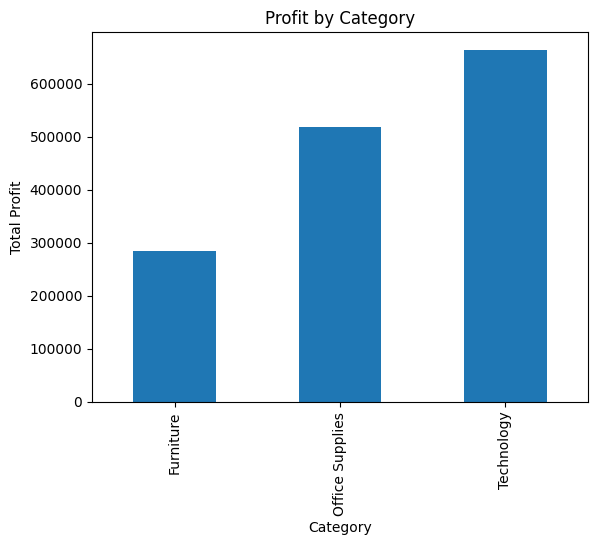

In [ ]:
cat_profit = data.groupby('Category')['Profit'].sum()
cat_profit.plot(kind='bar') 
plt.title('Profit by Category')
plt.xlabel('Category')
plt.ylabel('Total Profit')
plt.show()
# Conclusion: The hypothesis is supported as Technology products have highest profit margin of the three categories.

2. East region has highest sales compared to other regions

In [28]:
data.columns

Index(['Order Date', 'Ship Date', 'Ship Mode', 'Customer Name', 'Segment',
       'City', 'State', 'Country', 'Market', 'Region', 'Product ID',
       'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity',
       'Discount', 'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

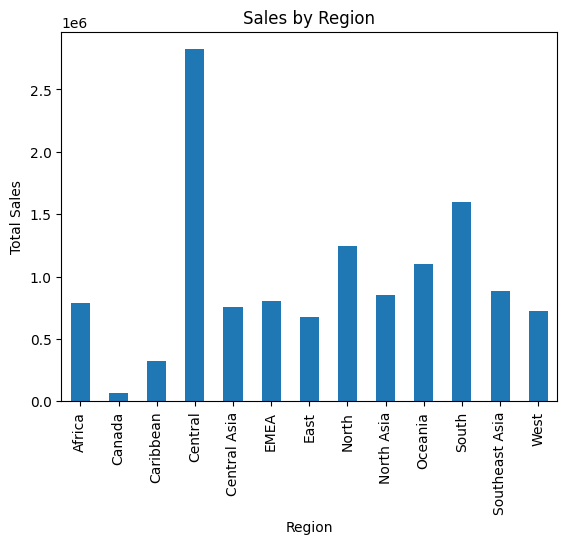

In [ ]:
reg_sales = data.groupby('Region')['Sales'].sum()
reg_sales.plot(kind='bar')
plt.title('Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.show()
# Conclusion: The hypothesis IS NOT supported as Central region has highest sales

3. Sales are higher during certain months of the year

In [32]:
data.columns

Index(['Order Date', 'Ship Date', 'Ship Mode', 'Customer Name', 'Segment',
       'City', 'State', 'Country', 'Market', 'Region', 'Product ID',
       'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity',
       'Discount', 'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

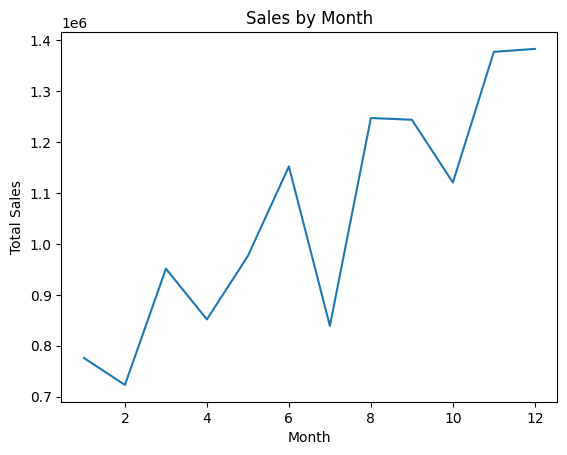

In [38]:
data['Order Month'] = pd.DatetimeIndex(data['Order Date']).month

month_sales = data.groupby('Order Month')['Sales'].sum()
month_sales.plot(kind='line')
plt.title('Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()
# Conclusion: The hypothesis is supported as November and December monthes have highest sales

4. Orders with same day shipping have the lowest rate of returned products

In [39]:
data.columns

Index(['Order Date', 'Ship Date', 'Ship Mode', 'Customer Name', 'Segment',
       'City', 'State', 'Country', 'Market', 'Region', 'Product ID',
       'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity',
       'Discount', 'Profit', 'Shipping Cost', 'Order Priority', 'Order Month'],
      dtype='object')

Ship Mode
First Class      25.08
Same Day         23.92
Second Class     24.08
Standard Class   24.48
dtype: float64


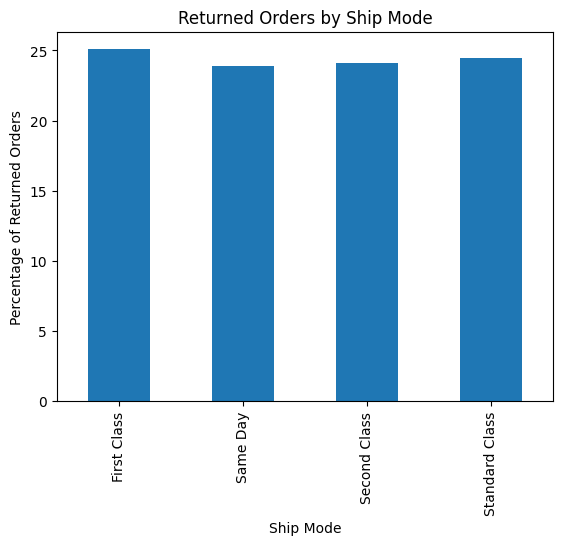

In [ ]:
total_orders_by_ship_mode = data.groupby('Ship Mode').size()

returned_orders_by_ship_mode = data[data['Profit'] < 0].groupby('Ship Mode').size()

returned_percent_by_ship_mode = (returned_orders_by_ship_mode / total_orders_by_ship_mode) * 100

print(returned_percent_by_ship_mode)

returned_percent_by_ship_mode.plot(kind='bar')
plt.title('Returned Orders by Ship Mode')
plt.xlabel('Ship Mode')
plt.ylabel('Percentage of Returned Orders')
plt.show()

# Conclusion: hypothesis is supported as Orders with same day shipping have the lowest rate of returned products

5. Company's profit is more on weekdays than on weekends

In [50]:
data.columns

Index(['Order Date', 'Ship Date', 'Ship Mode', 'Customer Name', 'Segment',
       'City', 'State', 'Country', 'Market', 'Region', 'Product ID',
       'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity',
       'Discount', 'Profit', 'Shipping Cost', 'Order Priority', 'Order Month'],
      dtype='object')

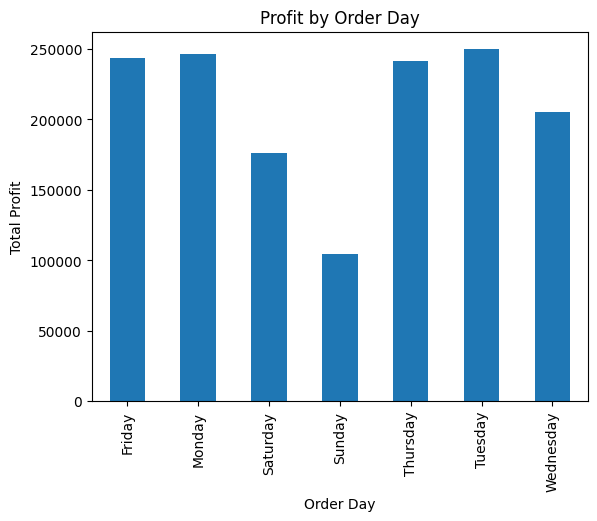

In [54]:
data['Order Day'] = pd.DatetimeIndex(data['Order Date']).day_name()

day_profit = data.groupby('Order Day')['Profit'].sum()

day_profit.plot(kind='bar')
plt.title('Profit by Order Day')
plt.xlabel('Order Day')
plt.ylabel('Total Profit')
plt.show()

# Conclusion: The hypothesis is supported as more profit on weekdays than on weekends